# Predicting Telco Customer Churn

## Exploratory Data Analysis 

In this section, we carry out some visualization and exploratory analysis of our dataset.

### Data and module importation

In [1]:
#Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Importing the dataset into a pandas dataframe
data = pd.read_csv('Telco.csv')

In [3]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Visualization and Analysis

Checking for missing values:

In [4]:
data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Great! Looks like we don't have any missing values

[Text(0.5, 0, 'Frequency')]

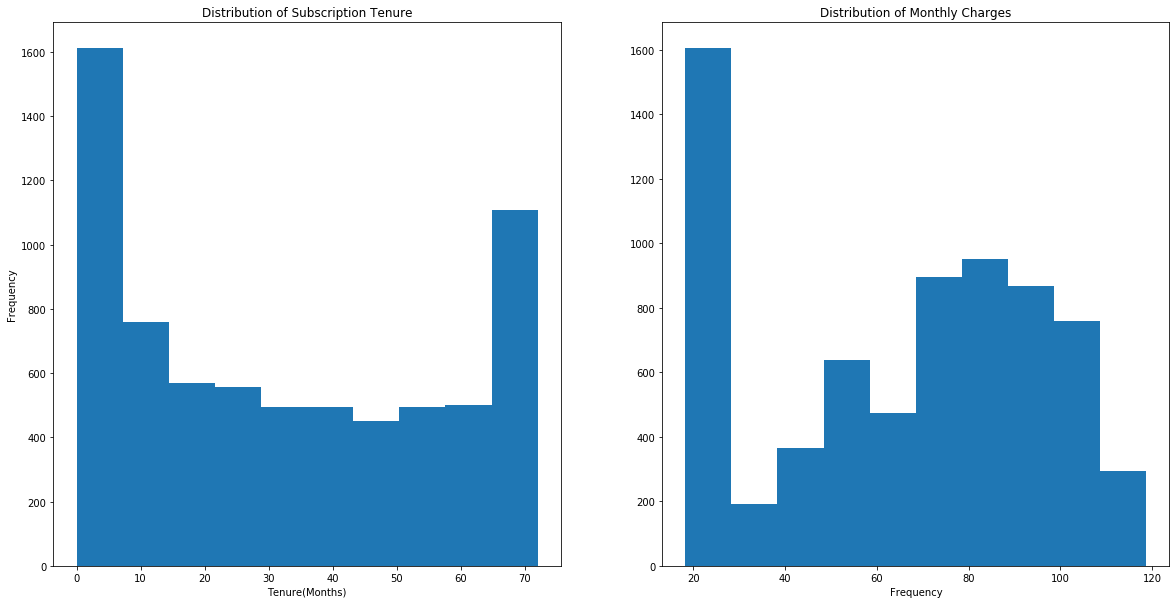

In [6]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
axes[0].hist(data.tenure)
axes[1].hist(data.MonthlyCharges)
axes[0].set_title('Distribution of Subscription Tenure')
axes[1].set_title('Distribution of Monthly Charges')
axes[0].set(xlabel="Tenure(Months)")
axes[0].set(ylabel="Frequency")
axes[1].set(xlabel="Monthly Charges($)")
axes[1].set(xlabel="Frequency")

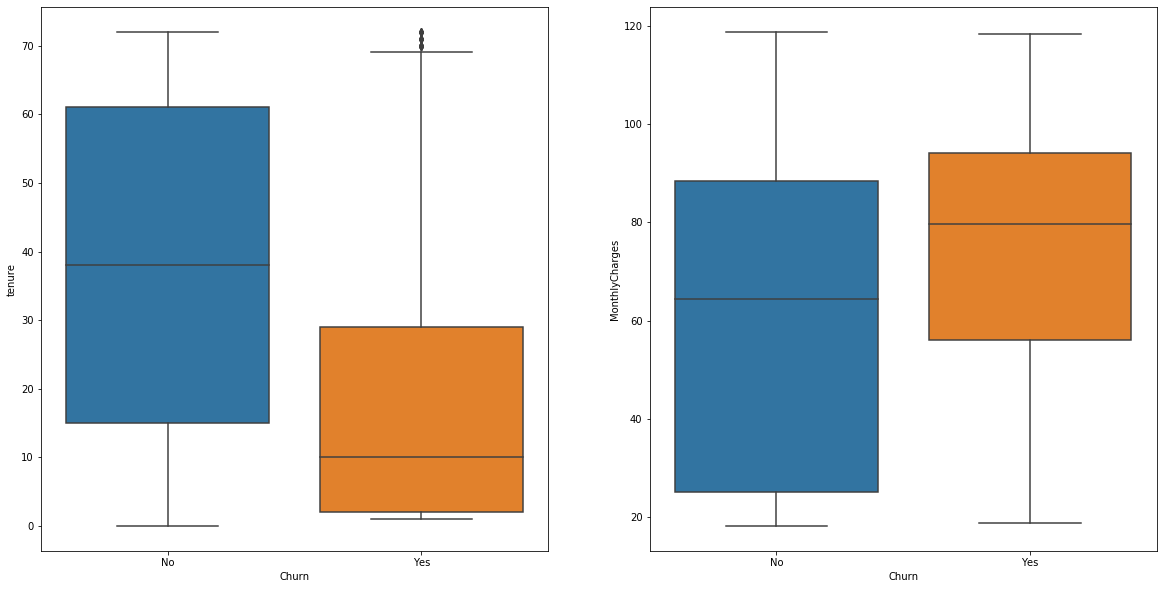

In [7]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
sns.boxplot(x="Churn",y="tenure",data=data,ax=axes[0])
sns.boxplot(x="Churn",y="MonthlyCharges",data=data,ax=axes[1])

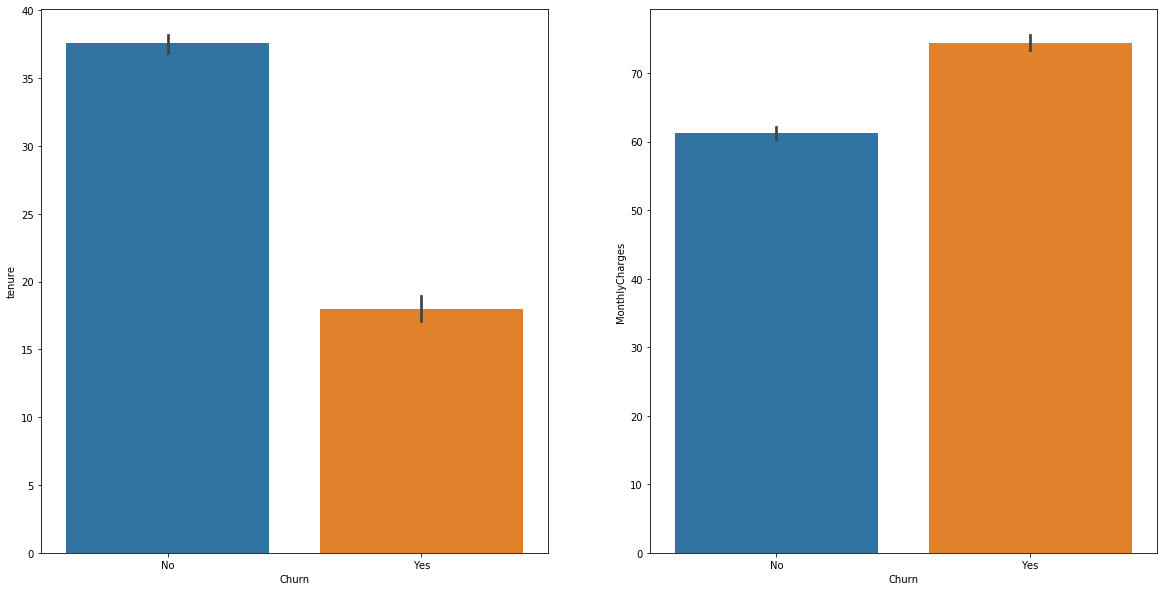

In [8]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
sns.barplot(x="Churn",y="tenure",data=data,ax=axes[0])
sns.barplot(x="Churn",y="MonthlyCharges",data=data,ax=axes[1])

In [9]:
data.groupby("gender").mean()

,SeniorCitizen,tenure,MonthlyCharges
gender,,,
Female,0.162844,32.244553,65.204243
Male,0.161463,32.495359,64.327482


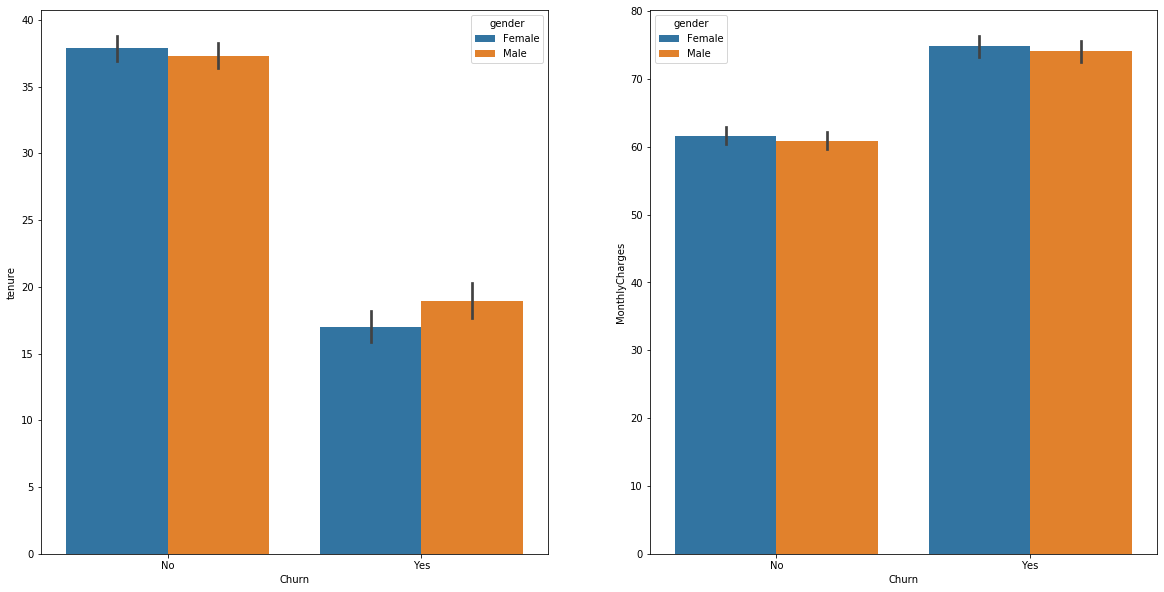

In [10]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
sns.barplot(x="Churn",y="tenure",hue="gender",data=data,ax=axes[0])
sns.barplot(x="Churn",y="MonthlyCharges",hue="gender",data=data,ax=axes[1])

## Data Pre-Processing

In this section, we transform our data into a form amenable to machine learning. We encode categorical features, normalize numerical features and perform other necessary pre-processings.

In [11]:
data.InternetService.value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

In [12]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

### Removing Redundant Information

We already have columns which indicate the type of phone service and internet service, or if the person doesn't have phone/internet service. Hence, we can replace the 
entries which say "No phone service" or "No internet service" in other columns such as OnlineSecurity with "No".

In [13]:
def makeNo(x):
    if x == "No internet service" or x=="No phone service":
        return "No"
    else:
        return x
for feature in data.columns:
    data[feature] = data[feature].apply(makeNo)

In [14]:
data.Contract.unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [15]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Feature Encoding

We encode the categorical variables using the pandas get_dummies function and drop the first category which serves as the base/reference category.

In [16]:
binary = []
for col in data.columns:
    if len(data[col].unique())==2:
        binary.append(col)

In [17]:
def enCode(x):
    if x=="Yes":
        return 1
    else:
        return 0
for b in binary:
    
    data[b] = data[b].apply(enCode)

In [18]:
data.InternetService.value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

In [19]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,0,DSL,0,...,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,0,0,0,0,34,1,0,DSL,1,...,1,0,0,0,One year,0,Mailed check,56.95,1889.5,0
2,3668-QPYBK,0,0,0,0,2,1,0,DSL,1,...,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,0,0,0,0,45,0,0,DSL,1,...,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,0,Fiber optic,0,...,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


Then we carry out feature encoding for the non-binary categorical features

In [20]:
InternetService_ = pd.get_dummies(data['InternetService'],drop_first=True)
Contract_ = pd.get_dummies(data['Contract'],drop_first=True)
PaymentMethod_ = pd.get_dummies(data['PaymentMethod'],drop_first=True)

In [21]:
df = pd.concat([data, InternetService_, Contract_,  PaymentMethod_],axis=1)

In [22]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,MonthlyCharges,TotalCharges,Churn,Fiber optic,No,One year,Two year,Credit card (automatic),Electronic check,Mailed check
0,7590-VHVEG,0,0,1,0,1,0,0,DSL,0,...,29.85,29.85,0,0,0,0,0,0,1,0
1,5575-GNVDE,0,0,0,0,34,1,0,DSL,1,...,56.95,1889.5,0,0,0,1,0,0,0,1
2,3668-QPYBK,0,0,0,0,2,1,0,DSL,1,...,53.85,108.15,1,0,0,0,0,0,0,1
3,7795-CFOCW,0,0,0,0,45,0,0,DSL,1,...,42.30,1840.75,0,0,0,1,0,0,0,0
4,9237-HQITU,0,0,0,0,2,1,0,Fiber optic,0,...,70.70,151.65,1,1,0,0,0,0,1,0


In [23]:
df.drop(["InternetService","Contract", "PaymentMethod"], axis=1, inplace=True)

In [24]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,...,MonthlyCharges,TotalCharges,Churn,Fiber optic,No,One year,Two year,Credit card (automatic),Electronic check,Mailed check
0,7590-VHVEG,0,0,1,0,1,0,0,0,1,...,29.85,29.85,0,0,0,0,0,0,1,0
1,5575-GNVDE,0,0,0,0,34,1,0,1,0,...,56.95,1889.5,0,0,0,1,0,0,0,1
2,3668-QPYBK,0,0,0,0,2,1,0,1,1,...,53.85,108.15,1,0,0,0,0,0,0,1
3,7795-CFOCW,0,0,0,0,45,0,0,1,0,...,42.30,1840.75,0,0,0,1,0,0,0,0
4,9237-HQITU,0,0,0,0,2,1,0,0,0,...,70.70,151.65,1,1,0,0,0,0,1,0


In [25]:
df.drop(["customerID"], axis=1, inplace=True)

In [26]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,MonthlyCharges,TotalCharges,Churn,Fiber optic,No,One year,Two year,Credit card (automatic),Electronic check,Mailed check
0,0,0,1,0,1,0,0,0,1,0,...,29.85,29.85,0,0,0,0,0,0,1,0
1,0,0,0,0,34,1,0,1,0,1,...,56.95,1889.5,0,0,0,1,0,0,0,1
2,0,0,0,0,2,1,0,1,1,0,...,53.85,108.15,1,0,0,0,0,0,0,1
3,0,0,0,0,45,0,0,1,0,1,...,42.30,1840.75,0,0,0,1,0,0,0,0
4,0,0,0,0,2,1,0,0,0,0,...,70.70,151.65,1,1,0,0,0,0,1,0


### Feature Scaling

Here we normalize the numerical features so we can have less biased results when we apply SVM and to speed up convergence when we optimize our neural network.

Let us check the variable type for our different features and coerce them to float or int type where necessary.

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
gender                     7043 non-null int64
SeniorCitizen              7043 non-null int64
Partner                    7043 non-null int64
Dependents                 7043 non-null int64
tenure                     7043 non-null int64
PhoneService               7043 non-null int64
MultipleLines              7043 non-null int64
OnlineSecurity             7043 non-null int64
OnlineBackup               7043 non-null int64
DeviceProtection           7043 non-null int64
TechSupport                7043 non-null int64
StreamingTV                7043 non-null int64
StreamingMovies            7043 non-null int64
PaperlessBilling           7043 non-null int64
MonthlyCharges             7043 non-null float64
TotalCharges               7043 non-null object
Churn                      7043 non-null int64
Fiber optic                7043 non-null uint8
No                         7043 non-null uin

We see that the TotalCharges column is not of numeric type so we coerce it to float in order to use this column for computations.

In [28]:
total=[]
for i in range(df.shape[0]):
    total.append(round(df.tenure[i]*df.MonthlyCharges[i],2))

df.TotalCharges = total
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
gender                     7043 non-null int64
SeniorCitizen              7043 non-null int64
Partner                    7043 non-null int64
Dependents                 7043 non-null int64
tenure                     7043 non-null int64
PhoneService               7043 non-null int64
MultipleLines              7043 non-null int64
OnlineSecurity             7043 non-null int64
OnlineBackup               7043 non-null int64
DeviceProtection           7043 non-null int64
TechSupport                7043 non-null int64
StreamingTV                7043 non-null int64
StreamingMovies            7043 non-null int64
PaperlessBilling           7043 non-null int64
MonthlyCharges             7043 non-null float64
TotalCharges               7043 non-null float64
Churn                      7043 non-null int64
Fiber optic                7043 non-null uint8
No                         7043 non-null ui

In [29]:
numeric = ["tenure", "MonthlyCharges", "TotalCharges"]

In [30]:
max(df["tenure"])

72

We carry out Min-Max scaling in the following block of code:

In [31]:
#Min-Max scaling
for feature in numeric:
    scaled=[]
    lo, hi = min(df[feature]), max(df[feature])
    for i in range(df.shape[0]):
        x = (df[feature][i]-lo)/(hi-lo)
        scaled.append(round(x,2))
    df[feature] = scaled

In [32]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,MonthlyCharges,TotalCharges,Churn,Fiber optic,No,One year,Two year,Credit card (automatic),Electronic check,Mailed check
0,0,0,1,0,0.01,0,0,0,1,0,...,0.12,0.00,0,0,0,0,0,0,1,0
1,0,0,0,0,0.47,1,0,1,0,1,...,0.39,0.23,0,0,0,1,0,0,0,1
2,0,0,0,0,0.03,1,0,1,1,0,...,0.35,0.01,1,0,0,0,0,0,0,1
3,0,0,0,0,0.62,0,0,1,0,1,...,0.24,0.22,0,0,0,1,0,0,0,0
4,0,0,0,0,0.03,1,0,0,0,0,...,0.52,0.02,1,1,0,0,0,0,1,0


## Dataset Split

In this section, we split our data into train, validation, and test sets using a ratio of 70-20-10.

In [33]:
y = df["Churn"]

In [34]:
X = df.drop(["Churn"], axis=1)

In [35]:
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,PaperlessBilling,MonthlyCharges,TotalCharges,Fiber optic,No,One year,Two year,Credit card (automatic),Electronic check,Mailed check
0,0,0,1,0,0.01,0,0,0,1,0,...,1,0.12,0.00,0,0,0,0,0,1,0
1,0,0,0,0,0.47,1,0,1,0,1,...,0,0.39,0.23,0,0,1,0,0,0,1
2,0,0,0,0,0.03,1,0,1,1,0,...,1,0.35,0.01,0,0,0,0,0,0,1
3,0,0,0,0,0.62,0,0,1,0,1,...,0,0.24,0.22,0,0,1,0,0,0,0
4,0,0,0,0,0.03,1,0,0,0,0,...,1,0.52,0.02,1,0,0,0,0,1,0


In [36]:
from sklearn.model_selection import train_test_split

In [37]:
#Dev and Test Split
X_dev, X_test, y_dev, y_test = train_test_split(X,y,test_size = 0.1, random_state = 46)

In [38]:
#Further Splitting the dev set into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_dev,y_dev,test_size=0.222, random_state =100)

In [39]:
print(y_test.shape)

(705,)


## Predicting Churn

In this section we predict customer churn using SVM, logistic regression, and multilayer perceptron classification techniques separately and combined.

In [40]:
#Creaing the list that would hold all test predictions from our four classifiers
Ensemble = []

In [44]:
def predict(model):
    """A function to compute the training and validation accuracies for a specified classifier"""
    #Model training
    model.fit(X_train,y_train)
    #Prediction on training set
    predictions = model.predict(X_train)
    train_accuracy = accuracy_score(y_train,predictions)
    #Prediction on validation set
    predictions = model.predict(X_val)
    val_accuracy = accuracy_score(y_val,predictions)
    
    return train_accuracy,val_accuracy

### Support Vector Machine (SVM)

In [45]:
#Importing the classifier
from sklearn.svm import SVC

In [46]:
#Importing some model evaluation tools
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

#### Training and Validation

In the following block of code, we train and validate our model using the different values of the regularization parameter C.

In [237]:
#Values of C
C_vals = [10**x for x in range(-4,5)]
SVM_results, T, V = {},[],[]
for i in range(len(C_vals)):
    model = SVC(C=C_vals[i])
    #Getting the training accuracy from the predict function
    T.append(predict(model)[0])
    #Getting the validation accuracy from the predict function
    V.append(predict(model)[1]) 

SVM_results["C"], SVM_results["Training Accuracy"], SVM_results["Validation Accuracy"] = C_vals,T,V
SVM_results = pd.DataFrame(SVM_results,columns=["C","Training Accuracy","Validation Accuracy"])

In [238]:
SVM_results

,C,Training Accuracy,Validation Accuracy
0,0.0001,0.733671,0.724432
1,0.0010,0.733671,0.724432
2,0.0100,0.733671,0.724432
3,0.1000,0.795132,0.781960
4,1.0000,0.811765,0.793324
5,10.0000,0.851724,0.774858
6,100.0000,0.907708,0.746449
7,1000.0000,0.930223,0.739347
8,10000.0000,0.944625,0.736506


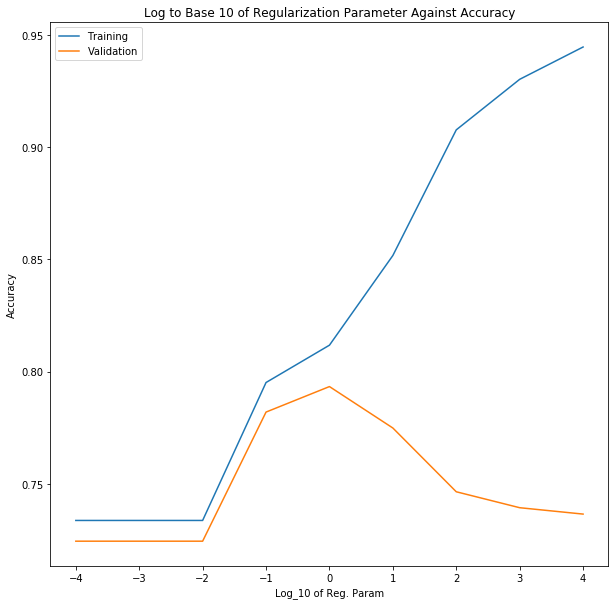

In [241]:
#log_10 values of C
powers = [x for x in range(-4,5)]
#Plotting the accuracies
plt.figure(figsize=(10,10))
plt.plot(powers,T,label="Training")
plt.plot(powers,V,label="Validation")
plt.xlabel("Log_10 of Reg. Param")
plt.ylabel("Accuracy")
plt.title("Log to Base 10 of Regularization Parameter Against Accuracy")
plt.legend(loc="upper left")

#### Testing

We yield our best accuracy when $C=10^0 = 1$, therefore we use this value of C for testing.

In [242]:
model = SVC(C=1)
#Fitting on the combined training and validation set, called dev set here
model.fit(X_dev, y_dev)
#Save model using pickle
import pickle
pickle.dump(model, open('SVM_model.sav', 'wb'))

In [47]:
# load the model from disk
import pickle
loaded_model = pickle.load(open('SVM_model.sav', 'rb'))
predictions = loaded_model.predict(X_test)
Ensemble.append(predictions)
x = 100*accuracy_score(y_test,predictions)
x=round(x,2)
print("Test Accuracy for SVM is", x,"%")

Test Accuracy for SVM is 81.28 %


### Logistic Regression

In [244]:
from sklearn.linear_model import LogisticRegression

In [245]:
LR_results, T, V = {},[],[]
for i in range(len(C_vals)):
    model = LogisticRegression(C=C_vals[i])
    T.append(predict(model)[0]) #Getting the training accuracy from the predict function
    V.append(predict(model)[1]) #Getting the validation accuracy from the predict function

LR_results["C"], LR_results["Training Accuracy"], LR_results["Validation Accuracy"] = C_vals,T,V
LR_results = pd.DataFrame(LR_results,columns=["C","Training Accuracy","Validation Accuracy"])

In [246]:
LR_results

,C,Training Accuracy,Validation Accuracy
0,0.0001,0.733671,0.724432
1,0.0010,0.733671,0.724432
2,0.0100,0.790669,0.786932
3,0.1000,0.802434,0.794744
4,1.0000,0.803043,0.794744
5,10.0000,0.806085,0.796875
6,100.0000,0.806897,0.793324
7,1000.0000,0.806897,0.793324
8,10000.0000,0.806694,0.793324


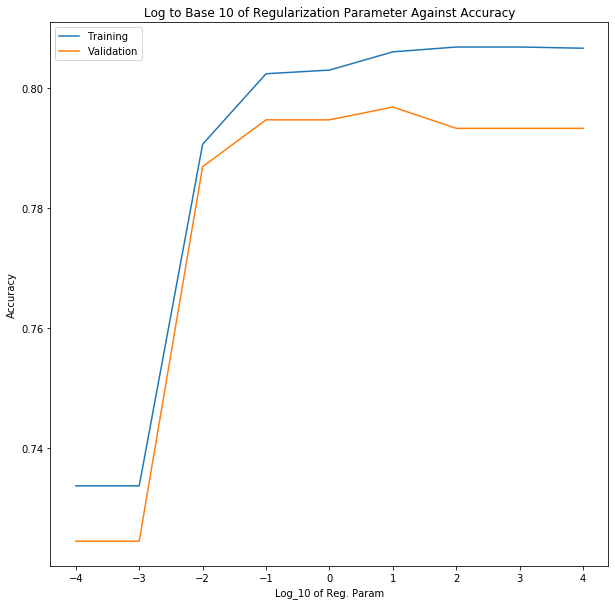

In [247]:
#Plotting the accuracies
plt.figure(figsize=(10,10))
plt.plot(powers,T,label="Training")
plt.plot(powers,V,label="Validation")
plt.xlabel("Log_10 of Reg. Param")
plt.ylabel("Accuracy")
plt.title("Log to Base 10 of Regularization Parameter Against Accuracy")
plt.legend(loc="upper left")

In [254]:
model = LogisticRegression(penalty="l2",C=100)
model.fit(X_dev,y_dev)
pickle.dump(model, open('LR_model.sav', 'wb'))

In [48]:
loaded_model = pickle.load(open('LR_model.sav', 'rb'))
predictions = loaded_model.predict(X_test)
Ensemble.append(predictions)
x = 100*accuracy_score(y_test,predictions)
x=round(x,2)
print("Test Accuracy for Logistic Regression is", x,"%")

Test Accuracy for Logistic Regression is 81.42 %


### Random Forest

In [53]:
#Importing the classifier
from sklearn.ensemble import RandomForestClassifier

In [55]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_trees = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Maximum number of levels in each tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]+[None]
# Minimum number of samples required for splitting
min_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_leaf = [1, 2, 4]

# Creating the grid
grid = {'n_estimators': n_trees,'max_depth': max_depth,'min_samples_split': min_split,'min_samples_leaf': min_leaf}
print(grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}


In [56]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = grid, n_iter = 200 , cv = 3, verbose=2, random_state=100, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_dev, y_dev)
rf_random.best_params_

Fitting 3 folds for each of 200 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   57.8s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  9.7min
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed: 16.7min finished


{'n_estimators': 400,
 'min_samples_split': 10,
 'min_samples_leaf': 4,
 'max_depth': 10}

In [57]:
#RF = RandomForestClassifier(n_estimators=1200,min_samples_split=10,min_samples_leaf=4,max_depth=10)
RF = RandomForestClassifier(**rf_random.best_params_)
RF.fit(X_dev,y_dev)
pickle.dump(RF, open('RF_model.sav', 'wb'))

In [58]:
loaded_model = pickle.load(open('RF_model.sav', 'rb'))
predictions = loaded_model.predict(X_test)
pred=loaded_model.predict(X_test)
accuracy_score(y_test,pred)
Ensemble.append(pred)
x = 100*accuracy_score(y_test,pred)
x=round(x,2)
print("Test Accuracy for Random Forest is", x,"%")

Test Accuracy for Random Forest is 80.99 %


### Neural Network

In [59]:
X_dev.shape

(6338, 23)

In [60]:
from keras import models
from keras import layers
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import Adam, RMSprop
from sklearn.datasets import make_classification

Using Theano backend.


In [61]:
def setup_network(optimizer, neurons, dropout_rate, learn_rate):
     # Start neural network
    network = models.Sequential()

    # Add fully connected layer with a ReLU activation function
    network.add(layers.Dense(neurons,activation='relu',input_shape=(23,)))

    # Add fully connected layer with a ReLU activation function
    network.add(layers.Dense(neurons,activation='relu'))
    
    #Specifying dropout
    network.add(layers.Dropout(dropout_rate))
    
    # Add fully connected layer with a sigmoid activation function
    network.add(layers.Dense(units=1, activation='sigmoid'))

    # Compile neural network
    if optimizer=="Adam":
        optimizer = Adam(learning_rate=learn_rate)
    else:
        optimizer = RMSprop(learning_rate=learn_rate)
    network.compile(loss='binary_crossentropy', # Cross-entropy
                    optimizer=optimizer, # Optimizer
                    metrics=['accuracy']) # Accuracy performance metric
    
    return network

In [62]:
# Wrap Keras model so it can be used by scikit-learn
neural_network = KerasClassifier(build_fn=setup_network, verbose=0)

In [64]:
# Create hyperparameter space
epochs = [5, 10]
batches = [5, 10, 100]
optimizers = ["Adam", "RMSprop"]
learn_rate = [0.001, 0.01, 0.1]
neurons = [4,8,16]
dropout_rate = [0.0, 0.25, 0.5, 0.75]
# Create hyperparameter options
hyperparameters = dict(optimizer=optimizers, epochs=epochs, batch_size=batches, dropout_rate=dropout_rate, neurons=neurons, learn_rate=learn_rate)
# Create grid search
grid = RandomizedSearchCV(estimator=neural_network, n_iter=20, cv=3, param_distributions=hyperparameters,verbose=2)
# Fit grid search
grid_result = grid.fit(X_dev,y_dev)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] optimizer=Adam, neurons=16, learn_rate=0.001, epochs=10, dropout_rate=0.75, batch_size=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  optimizer=Adam, neurons=16, learn_rate=0.001, epochs=10, dropout_rate=0.75, batch_size=100, total=   1.3s
[CV] optimizer=Adam, neurons=16, learn_rate=0.001, epochs=10, dropout_rate=0.75, batch_size=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s


[CV]  optimizer=Adam, neurons=16, learn_rate=0.001, epochs=10, dropout_rate=0.75, batch_size=100, total=   1.1s
[CV] optimizer=Adam, neurons=16, learn_rate=0.001, epochs=10, dropout_rate=0.75, batch_size=100 
[CV]  optimizer=Adam, neurons=16, learn_rate=0.001, epochs=10, dropout_rate=0.75, batch_size=100, total=   1.2s
[CV] optimizer=Adam, neurons=8, learn_rate=0.01, epochs=5, dropout_rate=0.75, batch_size=5 
[CV]  optimizer=Adam, neurons=8, learn_rate=0.01, epochs=5, dropout_rate=0.75, batch_size=5, total=   2.3s
[CV] optimizer=Adam, neurons=8, learn_rate=0.01, epochs=5, dropout_rate=0.75, batch_size=5 
[CV]  optimizer=Adam, neurons=8, learn_rate=0.01, epochs=5, dropout_rate=0.75, batch_size=5, total=   2.1s
[CV] optimizer=Adam, neurons=8, learn_rate=0.01, epochs=5, dropout_rate=0.75, batch_size=5 
[CV]  optimizer=Adam, neurons=8, learn_rate=0.01, epochs=5, dropout_rate=0.75, batch_size=5, total=   2.4s
[CV] optimizer=Adam, neurons=16, learn_rate=0.001, epochs=5, dropout_rate=0.0, bat

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:  1.9min finished


In [65]:
grid_result.best_params_

{'optimizer': 'RMSprop',
 'neurons': 16,
 'learn_rate': 0.001,
 'epochs': 10,
 'dropout_rate': 0.75,
 'batch_size': 5}

In [66]:
A, B = ["optimizer","neurons","learn_rate","dropout_rate"], ["epochs","batch_size"]
[paramsA, paramsB] = map(lambda keys: {x: grid_result.best_params_[x] for x in keys}, [A,B])

In [67]:
#model = setup_network(optimizer="RMSprop",neurons=4,learn_rate=0.01,dropout_rate=0.5)
model = setup_network(**paramsA)
model.fit(X_dev,y_dev,**paramsB)
pickle.dump(RF, open('NN_model.sav', 'wb'))

Epoch 1/10
6338/6338 [==============================] - 0s 70us/step - loss: 0.5536 - accuracy: 0.7203
Epoch 2/10
6338/6338 [==============================] - 0s 69us/step - loss: 0.5032 - accuracy: 0.7618
Epoch 3/10
6338/6338 [==============================] - 0s 70us/step - loss: 0.4976 - accuracy: 0.7640
Epoch 4/10
6338/6338 [==============================] - 0s 65us/step - loss: 0.5004 - accuracy: 0.7654
Epoch 5/10
6338/6338 [==============================] - 0s 72us/step - loss: 0.5101 - accuracy: 0.7712
Epoch 6/10
6338/6338 [==============================] - 0s 67us/step - loss: 0.5086 - accuracy: 0.7711
Epoch 7/10
6338/6338 [==============================] - 0s 71us/step - loss: 0.5047 - accuracy: 0.7723
Epoch 8/10
6338/6338 [==============================] - 0s 73us/step - loss: 0.5099 - accuracy: 0.7782
Epoch 9/10
6338/6338 [==============================] - 0s 67us/step - loss: 0.5146 - accuracy: 0.7690
Epoch 10/10
6338/6338 [==============================] - 0s 73us/step - l

In [68]:
loaded_model = pickle.load(open('NN_model.sav', 'rb'))
predictions = loaded_model.predict(X_test)
pred = np.round(model.predict(X_test))
accuracy_score(y_test,pred)
Ensemble.append(pred)
x = 100*accuracy_score(y_test,pred)
x=round(x,2)
print("Test Accuracy for Neural Network is", x,"%")

Test Accuracy for Neural Network is 82.13 %


In [199]:
grid

RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x0000021BE5B33198>,
                   iid='deprecated', n_iter=1, n_jobs=None,
                   param_distributions={'batch_size': [5, 10, 100],
                                        'dropout_rate': [0.0, 0.25, 0.5, 0.75],
                                        'epochs': [5, 10],
                                        'learn_rate': [0.001, 0.01, 0.1],
                                        'neurons': [4, 8, 16],
                                        'optimizer': ['Adam', 'RMSprop']},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=2)

### Combining Classifiers

In this section we combine the predictions of our four classifiers. We try two methods: A) Predict $0$ when there's a tie (i.e when we have two $0$ predictions and two $1$ predictions) and B) Predict $1$ when there's a tie. 

19